# Exploratory data analysis : Automobile sale

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [13]:
df = pd.read_csv("/data/notebook_files/auto_sale_data.csv")

In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [12]:
df.shape

(2747, 20)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [14]:
# rename columns name
df.columns = df.columns.str.lower()
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'days_since_lastorder', 'status', 'productline',
       'msrp', 'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [15]:
df = df.rename(columns={'ordernumber' : 'order_number',
                   'quantityordered' : 'quantity_order',
                   'priceeach' : 'price_each' ,
                   'orderlinenumber' : 'order_line_number',
                   'sales': 'sales',
                   'orderdate' : 'order_date',
                   'days_since_lastorder' : 'day_since_last_order',
                   'status' : 'status',
                   'productline' : 'product_line',
                   'msrp' : 'msrp',
                   'productcode' : 'product_code',
                   'customername' : 'customer_name',
                   'phone' : 'phone',
                   'addressline1' : 'adress_line1',
                   'city' : 'city',
                   'postalcode' : 'postal_code',
                   'country' : 'country',
                   'contactlastname' : 'contact_last_name',
                   'contactfirstname' : 'contact_first_name',
                   'dealsize' : 'deal_size'} )

In [16]:
# Check missing value
df.isna().sum()

order_number 0
quantity_order 0
price_each 0
order_line_number 0
sales 0
order_date 0
day_since_last_order 0
status 0
product_line 0
msrp 0
product_code 0
customer_name 0
phone 0
adress_line1 0
city 0
postal_code 0
country 0
contact_last_name 0
contact_first_name 0
deal_size 0
dtype: int64

In [17]:
# Check duplicated value
df.duplicated().sum()

0

In [21]:
# Numerical variables summary
df.describe()

,order_number,quantity_order,price_each,order_line_number,sales,day_since_last_order,msrp
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [19]:
# Categorical variables summary
df.select_dtypes("object").describe()

,order_date,status,product_line,product_code,customer_name,phone,adress_line1,city,postal_code,country,contact_last_name,contact_first_name,deal_size
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,246,6,7,109,89,88,89,71,73,19,76,72,3
top,14/11/2018,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,38,2541,949,51,259,259,259,304,259,928,259,259,1349


# Univariate analysis

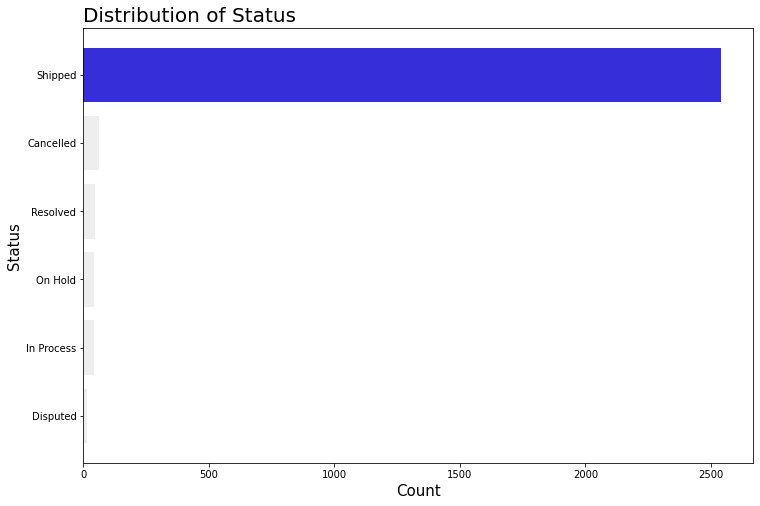

In [20]:
# Distribution of status
sub_df = df['status'].value_counts().sort_values(ascending=True)
plt.figure(figsize = (12,8))
colors = ["#EEEEEE", "#EEEEEE", "#EEEEEE","#EEEEEE","#EEEEEE","#362FD9"]

plt.barh(sub_df.index,sub_df.values, color = colors)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Status", fontsize = 15)
plt.title("Distribution of Status", loc = "left", fontsize = 20)
plt.show()

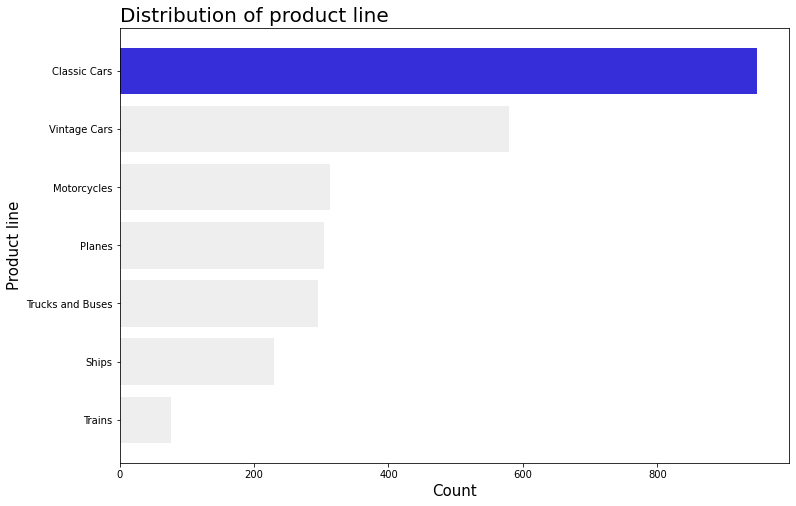

In [21]:
# Distribution of product_line
sub_df = df['product_line'].value_counts().sort_values(ascending=True)
plt.figure(figsize = (12,8))
colors = ["#EEEEEE", "#EEEEEE", "#EEEEEE","#EEEEEE","#EEEEEE","#EEEEEE","#362FD9"]

plt.barh(sub_df.index,sub_df.values, color = colors)
plt.xlabel("Count",fontsize = 15)
plt.ylabel("Product line", fontsize = 15)
plt.title("Distribution of product line", loc = "left", fontsize = 20)
plt.show()

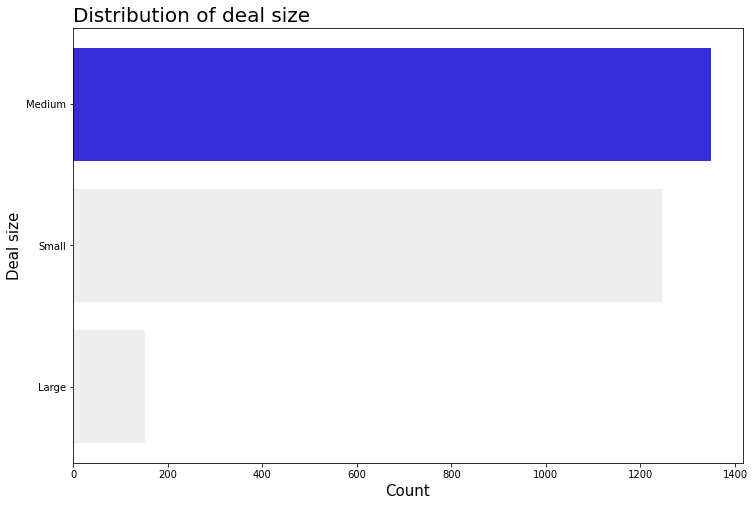

In [22]:
# Distribution of deal size
sub_df = df['deal_size'].value_counts().sort_values(ascending=True)
plt.figure(figsize = (12,8))
colors = ["#EEEEEE", "#EEEEEE", "#362FD9"]

plt.barh(sub_df.index,sub_df.values, color =colors)
plt.xlabel("Count",fontsize = 15)
plt.ylabel("Deal size", fontsize = 15)
plt.title("Distribution of deal size", loc = "left", fontsize = 20)
plt.show()

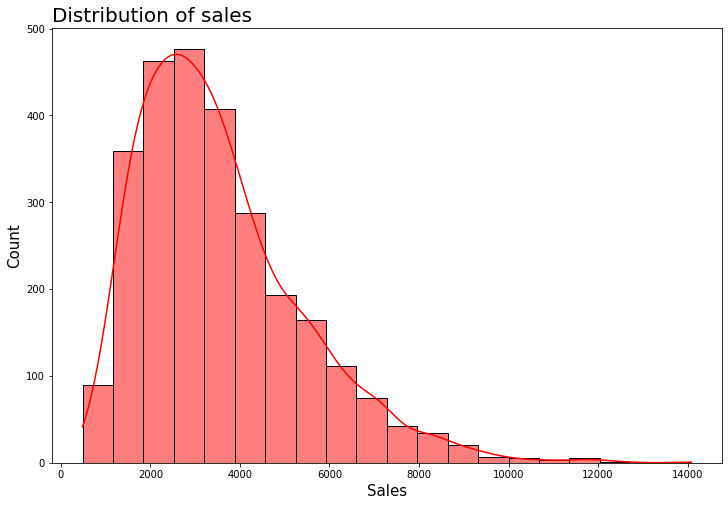

In [23]:
# Distribution of sales
plt.figure(figsize = (12,8))

sns.histplot(df["sales"], kde = True, bins = 20, color="red")
plt.xlabel("Sales", fontsize = 15)
plt.ylabel("Count" , fontsize = 15)
plt.title("Distribution of sales", fontsize = 20, loc = "left")
plt.show()

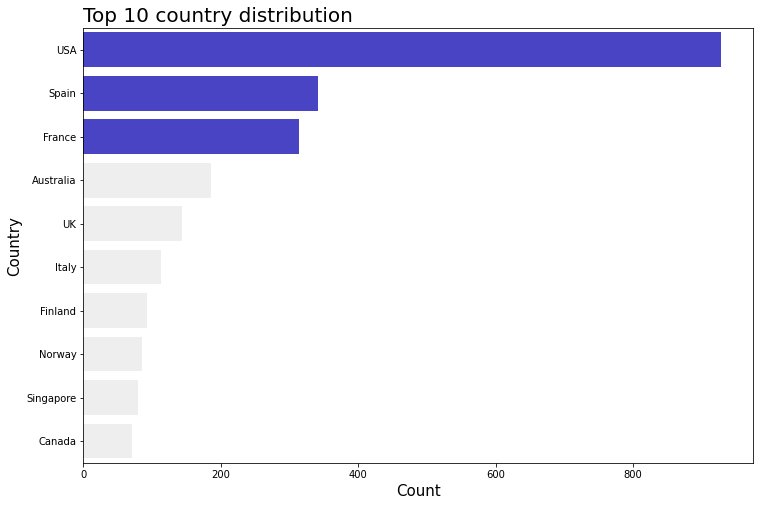

In [24]:
# Top 10 country
sub_df = df["country"].value_counts().head(10).reset_index()


plt.figure(figsize=(12,8))
colors = ["#362FD9"]*3+ ["#EEEEEE"]*7
sns.barplot(data= sub_df, y = "index", x = "country", orient="h", palette=  colors)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.title("Top 10 country distribution", loc = "left", fontsize = 20 )
plt.show()

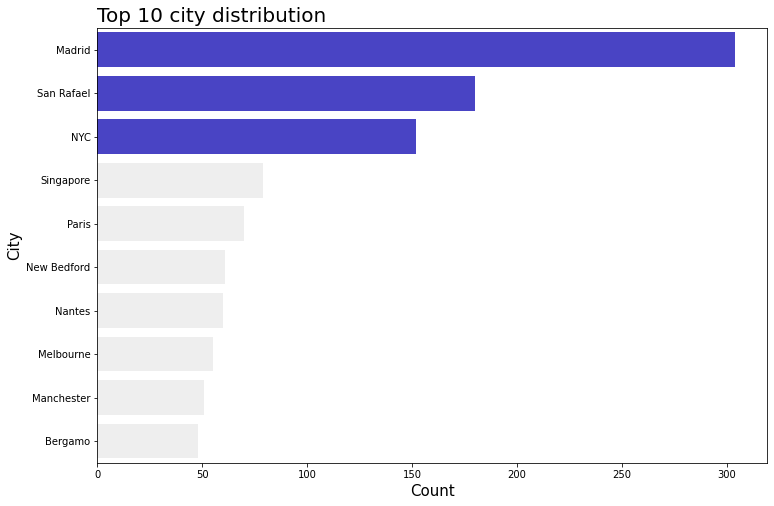

In [23]:
# Top 10 country
sub_df = df["city"].value_counts().head(10).reset_index()


plt.figure(figsize=(12,8))
colors = ["#362FD9"]*3+ ["#EEEEEE"]*7
sns.barplot(data= sub_df, y = "index", x = "city", orient="h", palette=  colors)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("City", fontsize = 15)
plt.title("Top 10 city distribution", loc = "left", fontsize = 20 )
plt.show()

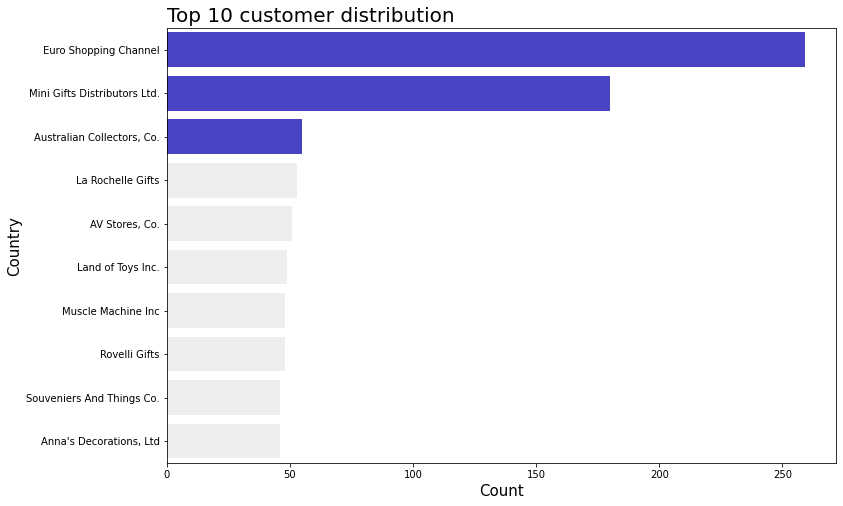

In [26]:
# Top 10 customer
sub_df = df["customer_name"].value_counts().head(10).reset_index()


plt.figure(figsize=(12,8))
colors = ["#362FD9"]*3+ ["#EEEEEE"]*7
sns.barplot(data= sub_df, y = "index", x = "customer_name", orient="h", palette=  colors)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Country", fontsize = 15)
plt.title("Top 10 customer distribution", loc = "left", fontsize = 20 )
plt.show()

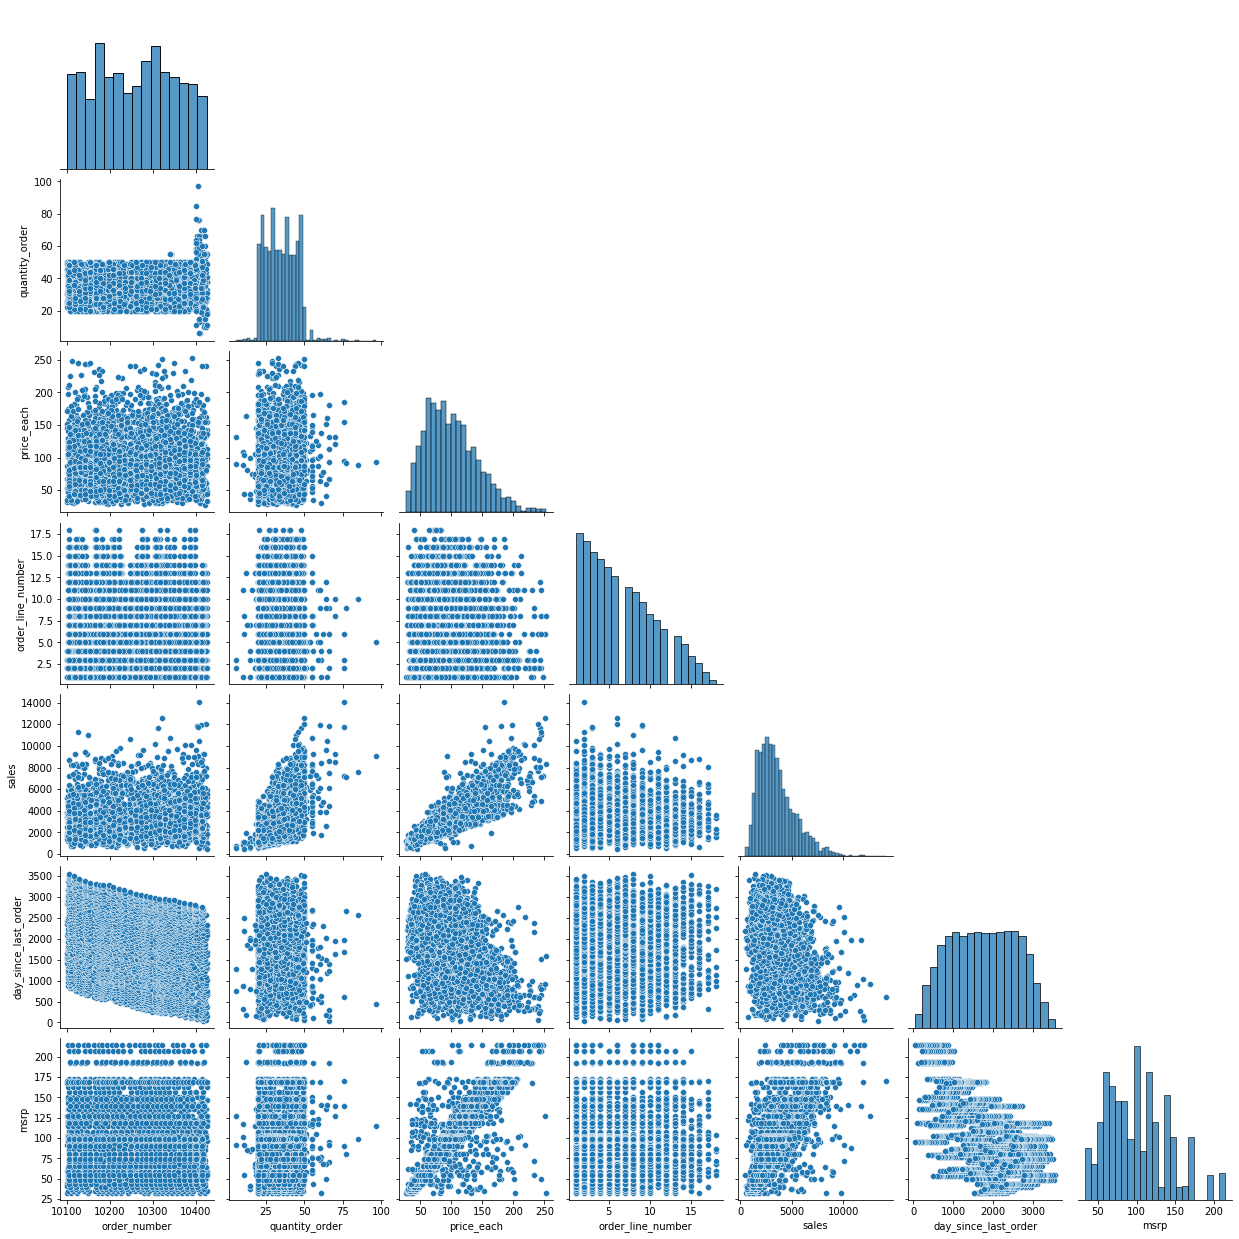

In [27]:
# pair plot

sns.pairplot(df, corner= True)
plt.show()

<ipython-input-28-bda549414408>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.0, 1.0, 'Correlation heat map')

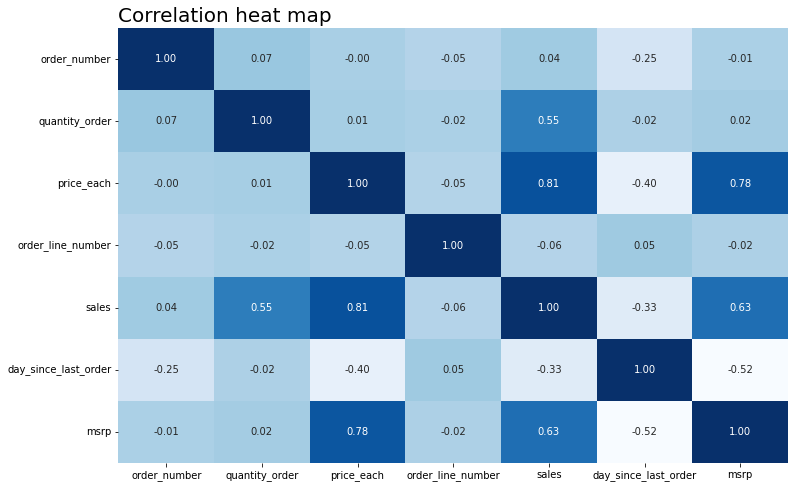

In [28]:
# heat map
plt.figure(figsize = (12,8))
corr = df.corr()
sns.heatmap(corr, annot= True,fmt=".2f", cbar=False, cmap="Blues")
plt.title("Correlation heat map", fontsize = 20, loc= "left")

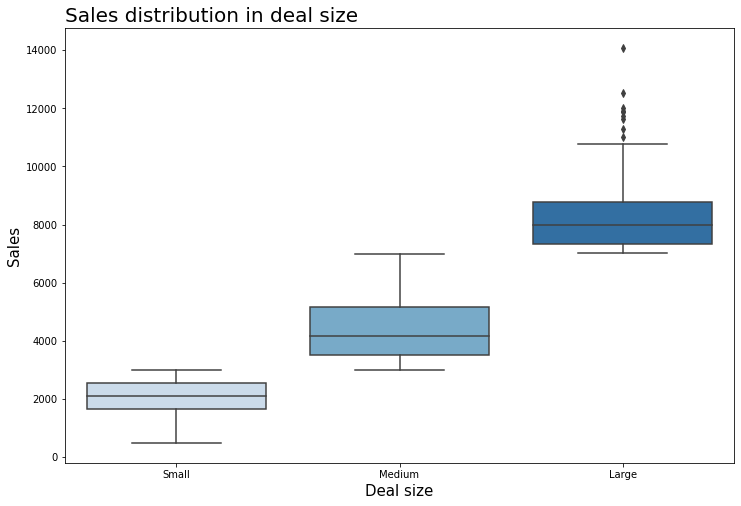

In [29]:
# sales distribution on each deal size
plt.figure(figsize = (12,8))
sns.boxplot( x = 'deal_size',y = 'sales' , data =df, palette='Blues')
plt.title("Sales distribution in deal size", fontsize = 20, loc = "left")
plt.xlabel("Deal size", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()

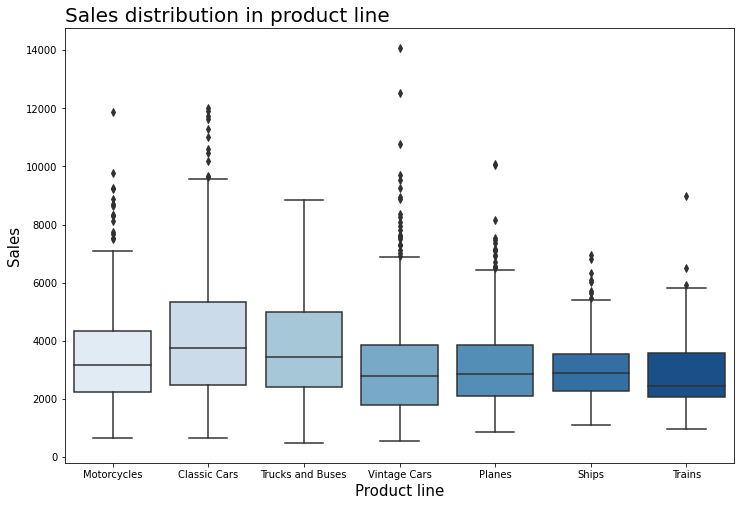

In [30]:
# sales distribution in each product line
plt.figure(figsize = (12,8))
sns.boxplot( x = 'product_line',y = 'sales' , data =df, palette='Blues')
plt.title("Sales distribution in product line", fontsize = 20, loc = "left")
plt.xlabel("Product line", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()

<ipython-input-31-1d9ebdc8a62d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["order_date"] = pd.to_datetime(df["order_date"])
<ipython-input-31-1d9ebdc8a62d>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data = sub_df[sub_df["year"] != 2020], x = "month", y = "sales", hue = "year", palette=palette)


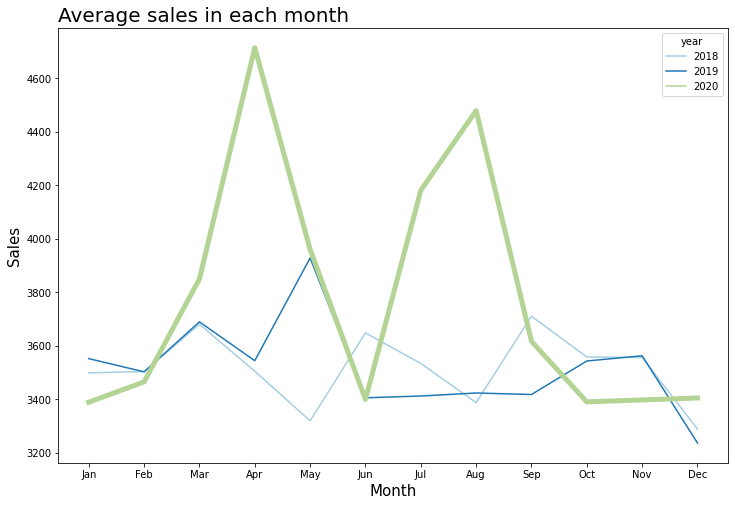

In [31]:

df["order_date"] = pd.to_datetime(df["order_date"])
df["month"] = df["order_date"].dt.strftime('%b')
df["year"] = df["order_date"].dt.year
sub_df = df.groupby(["year", "month"])["sales"].mean().reset_index()

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sub_df["month"] = pd.Categorical(sub_df["month"], categories=month_order, ordered=True)


plt.figure(figsize=(12,8))
palette = sns.color_palette("Paired", len(sub_df["year"].unique()))
sns.lineplot(data = sub_df[sub_df["year"] != 2020], x = "month", y = "sales", hue = "year", palette=palette)
sns.lineplot(data = sub_df[sub_df["year"] == 2020] , x = "month", y = "sales", hue = "year",  linewidth = 5, palette= ["#B3D495"])
plt.title("Average sales in each month", fontsize = 20, loc = "left")
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()

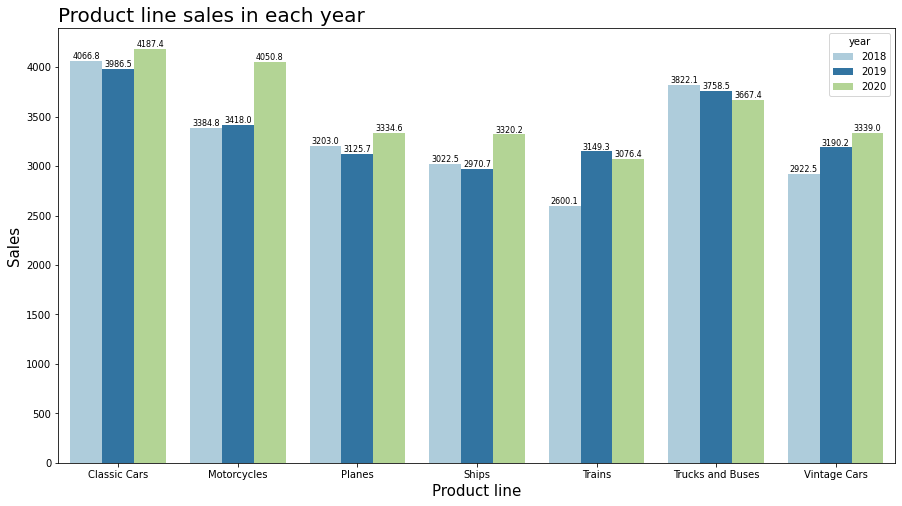

In [32]:
sub_df = df.groupby(["year", "product_line"])["sales"].mean().reset_index()
sub_df


plt.figure(figsize=(15,8))
palette = sns.color_palette("Paired", len(sub_df["year"].unique()))
sns.barplot(data = sub_df, x = "product_line", y = "sales", hue = "year", palette=palette)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    
plt.title("Product line sales in each year", fontsize = 20, loc = "left")
plt.xlabel("Product line", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()


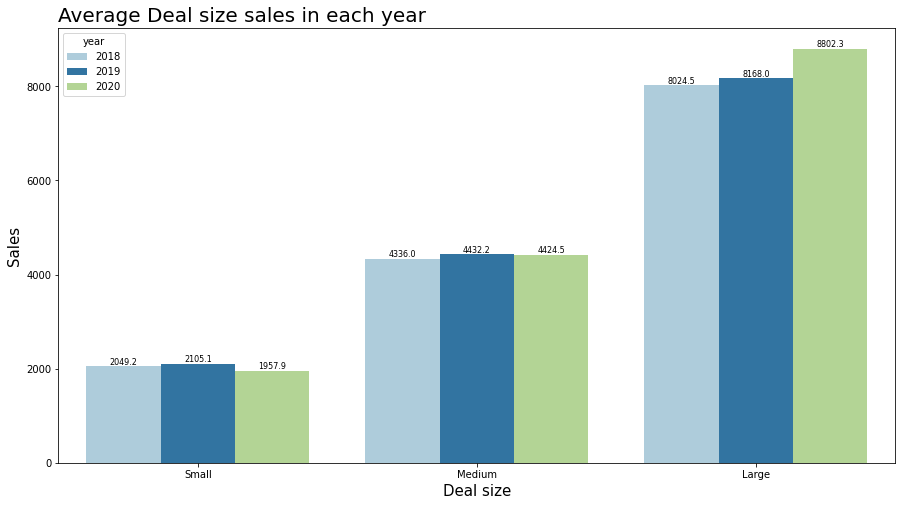

In [33]:
sub_df = df.groupby(["year", "deal_size"])["sales"].mean().reset_index().sort_values('sales',ascending= True)



plt.figure(figsize=(15,8))
palette = sns.color_palette("Paired", len(sub_df["year"].unique()))
sns.barplot(data = sub_df, x = "deal_size", y = "sales", hue = "year", palette=palette)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    
plt.title("Average Deal size sales in each year", fontsize = 20, loc = "left")
plt.xlabel("Deal size", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show()


In [34]:
sub_df

,year,deal_size,sales
8,2020,Small,1957.918141
2,2018,Small,2049.230307
5,2019,Small,2105.102099
1,2018,Medium,4335.993862
7,2020,Medium,4424.522335
4,2019,Medium,4432.229922
0,2018,Large,8024.481961
3,2019,Large,8168.016290
6,2020,Large,8802.328462


In [35]:
df

,order_number,quantity_order,price_each,order_line_number,sales,order_date,day_since_last_order,status,product_line,msrp,...,phone,adress_line1,city,postal_code,country,contact_last_name,contact_first_name,deal_size,month,year
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small,Feb,2018
1,10121,34,81.35,5,2765.90,2018-07-05,757,Shipped,Motorcycles,95,...,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small,Jul,2018
2,10134,41,94.74,2,3884.34,2018-01-07,703,Shipped,Motorcycles,95,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium,Jan,2018
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium,Aug,2018
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium,Oct,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-02-12,2924,Shipped,Ships,54,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small,Feb,2019
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,...,981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium,Jan,2020
2744,10386,43,125.99,4,5417.57,2020-01-03,2836,Resolved,Ships,54,...,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium,Jan,2020
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,...,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small,Mar,2020


# Customer retention by cohort analysis

In [60]:
# Cohort analysis : Customer retention rate
df["order_date"] = pd.to_datetime(df["order_date"])

# Create first transaction on each customer
df['cohort_year'] = df.groupby(["customer_name"])["order_date"].transform('min').dt.year
df.head(5)

,order_number,quantity_order,price_each,order_line_number,sales,order_date,day_since_last_order,status,product_line,msrp,...,postal_code,country,contact_last_name,contact_first_name,deal_size,month,year,cohort_month,cohort_index,cohort_year
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,10022,USA,Yu,Kwai,Small,Feb,2018,2018-02-24,1.0,2018
1,10121,34,81.35,5,2765.90,2018-07-05,757,Shipped,Motorcycles,95,...,51100,France,Henriot,Paul,Small,Jul,2018,2018-07-05,1.0,2018
2,10134,41,94.74,2,3884.34,2018-01-07,703,Shipped,Motorcycles,95,...,75508,France,Da Cunha,Daniel,Medium,Jan,2018,2018-01-07,1.0,2018
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,90003,USA,Young,Julie,Medium,Aug,2018,2018-08-25,1.0,2018
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,94217,USA,Hirano,Juri,Medium,Oct,2018,2018-07-24,1.0,2018


ใน Pandas สามารถนำ Datetime format มาลบได้กันเพื่อหาเป็น Day interval ได้ตรง ๆ แต่หน่วยที่ Return กลับมาคือหน่วยวัน ซึ่งสามารถใช้ np.timedelta64() เพื่อแปลงให้เป็น Month interval ได้อีกที

In [62]:
# Create time offset in month interval
df['cohort_index'] = df['order_date'].dt.year - df['cohort_year']+1
df.head(5)

,order_number,quantity_order,price_each,order_line_number,sales,order_date,day_since_last_order,status,product_line,msrp,...,postal_code,country,contact_last_name,contact_first_name,deal_size,month,year,cohort_month,cohort_index,cohort_year
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,10022,USA,Yu,Kwai,Small,Feb,2018,2018-02-24,1,2018
1,10121,34,81.35,5,2765.90,2018-07-05,757,Shipped,Motorcycles,95,...,51100,France,Henriot,Paul,Small,Jul,2018,2018-07-05,1,2018
2,10134,41,94.74,2,3884.34,2018-01-07,703,Shipped,Motorcycles,95,...,75508,France,Da Cunha,Daniel,Medium,Jan,2018,2018-01-07,1,2018
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,90003,USA,Young,Julie,Medium,Aug,2018,2018-08-25,1,2018
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,94217,USA,Hirano,Juri,Medium,Oct,2018,2018-07-24,1,2018


In [63]:

# Count unique customer per period
df_cohort = df.groupby(["cohort_year", "cohort_index"])["customer_name"].count().reset_index()
df_cohort.head()

,cohort_year,cohort_index,customer_name
0,2018,1,953
1,2018,2,856
2,2018,3,363
3,2019,1,473
4,2019,2,102


In [64]:
# create pivot table
df_cohort = pd.pivot_table(df_cohort, 
                           values = "customer_name",
                           index = ["cohort_year"],
                           columns = ["cohort_index"])

df_cohort

cohort_index,1,2,3
cohort_year,,,
2018,953.0,856.0,363.0
2019,473.0,102.0,NaN


สิ่งที่นิยมทำใน Cohort analysis คือการเปลี่ยนข้อมูลที่ Observe ให้อยู่ในรูปของ Percentage เพื่อให้สามารถทำการวิเคราะห์ได้ง่ายขึ้น โดยให้ใช้ข้อมูลที่จุด Observe หรือ Cohort index ที่ 1 เป็นตัวหารสำหรับข้อมูลที่ Cohort ถัด ๆ ไป ใน Pandas สามารถใช้ .divided(axis = 0) เพื่อเป็นการหารในแต่ละแถว

In [65]:
# calculate retention rate
df_cohort = df_cohort.divide(df_cohort.iloc[:,0], axis=0)
df_cohort

cohort_index,1,2,3
cohort_year,,,
2018,1.0,0.898216,0.380902
2019,1.0,0.215645,NaN


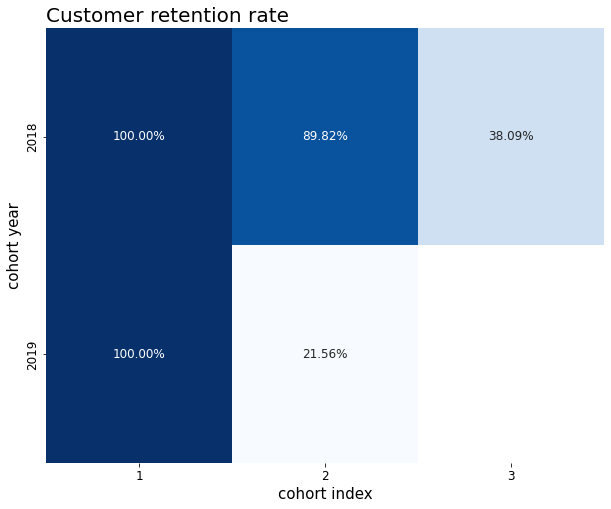

In [82]:
# plot heat map
plt.figure(figsize=(10,8))
sns.heatmap(df_cohort, annot= True, fmt = ".2%", cmap = "Blues", cbar = False, annot_kws= {"fontsize": 12})
plt.title("Customer retention rate", fontsize = 20, loc = "left")
plt.xlabel("cohort index", fontsize = 15)
plt.ylabel("cohort year", fontsize = 15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.show()

In [72]:
# # Cohort analysis : Sales rate
df_sales = df.groupby(["cohort_index", "cohort_year"])["sales"].mean().reset_index()
df_sales.head()

,cohort_index,cohort_year,sales
0,1,2018,3518.377817
1,1,2019,3427.103911
2,2,2018,3561.804217
3,2,2019,3914.771863
4,3,2018,3685.885289


In [73]:
# create pivot table
df_sales = pd.pivot_table(df_sales,
                          values = "sales",
                          index = ["cohort_year"],
                          columns = ["cohort_index"])
df_sales.head()

cohort_index,1,2,3
cohort_year,,,
2018,3518.377817,3561.804217,3685.885289
2019,3427.103911,3914.771863,NaN


In [74]:
# calculate sales rate
df_sales = df_sales.divide(df_sales.iloc[:,0], axis=0)
df_sales

cohort_index,1,2,3
cohort_year,,,
2018,1.0,1.012343,1.047609
2019,1.0,1.142297,NaN


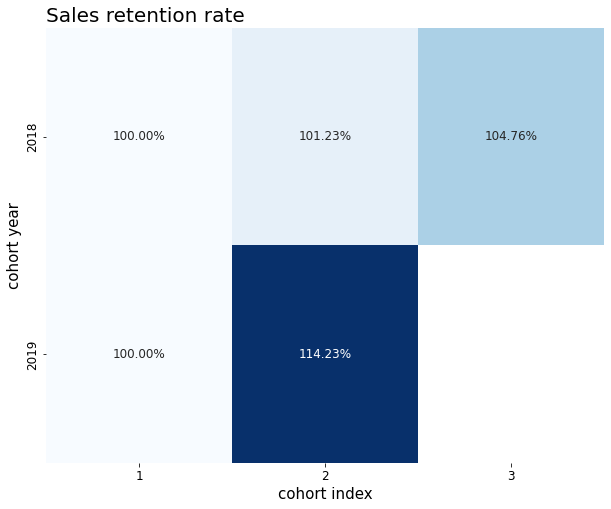

In [83]:
# plot heat map
plt.figure(figsize=(10,8))
sns.heatmap(df_sales, annot= True, fmt = ".2%", cmap = "Blues", cbar = False, annot_kws= {"fontsize": 12})
plt.title("Sales retention rate", fontsize = 20, loc = "left")
plt.xlabel("cohort index", fontsize = 15)
plt.ylabel("cohort year", fontsize = 15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.show()